### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement Scenario:

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

In [3]:
train_df = pd.read_csv(r'E:\Simplilearn\project\ML\Projects for Submission\Project 1 - Mercedes-Benz Greener Manufacturing\train.csv')
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


1. 8 columns are object type need to be transformed using labelencoder.
2. ID column must be remove because it have all unique value.
3. Y is target variable must be pop out

### Exploratory data Analysis

In [6]:
y_train = train_df['y']

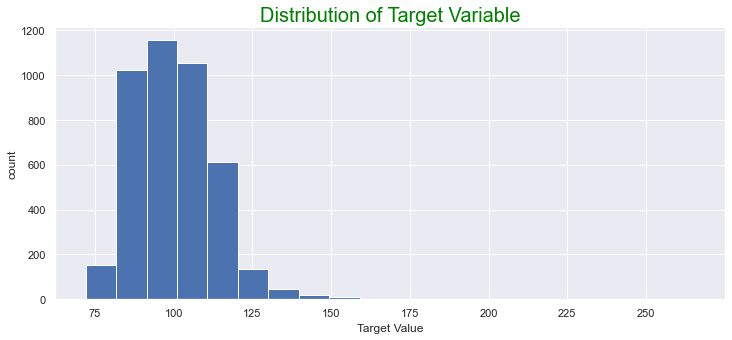

In [7]:
plt.figure(figsize=(12,5))
plt.hist(y_train,bins=20)
plt.title('Distribution of Target Variable',fontdict={'color': 'green',
                                                     'fontsize':20})
plt.ylabel('count')
plt.xlabel('Target Value')
plt.show()

In [8]:
print('Statistics of target variable')
print('minimum value: ',y_train.min())
print('maximum value: ',y_train.max())
print('mean: ',y_train.mean())
print('standard deviation: ',y_train.std())

Statistics of target variable
minimum value:  72.11
maximum value:  265.32
mean:  100.66931812782134
standard deviation:  12.679381281524673


1. Normal distribution is centered around 100.
2. we need to remove outlier.

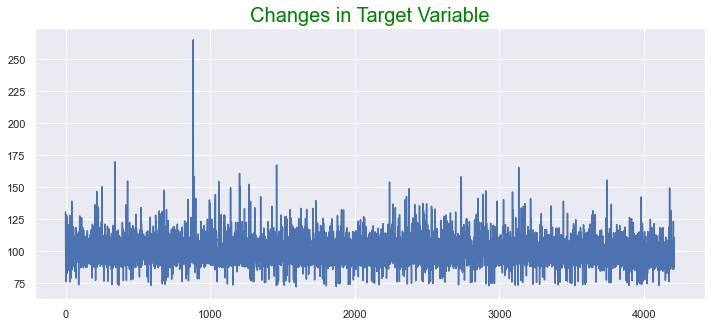

In [9]:
## check the outliers
plt.figure(figsize=(12,5))
plt.plot(y_train)
plt.title('Changes in Target Variable',fontdict={'color': 'green',
                                                     'fontsize':20})
plt.show()

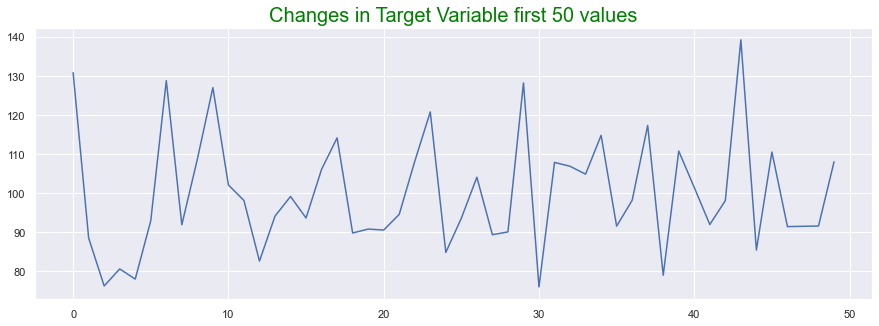

In [10]:
## check the outliers
plt.figure(figsize=(15,5))
plt.plot(y_train[:50])
plt.title('Changes in Target Variable first 50 values',fontdict={'color': 'green',
                                                     'fontsize':20})
plt.show()

1. No pattern in the target data, so it is not timeseries data.
2. we have to remove outlier.

In [11]:
# Removing outlier from target variable. Since we easily detect only one outlier from graph, so we simple remove that row.
train_df = train_df[train_df['y']<175]
y_train = train_df.pop('y')

### Explore input data

In [12]:
col_list = list(train_df.columns)
print('Total number of input columns: %d'%len(col_list))
print('columns type:\n',train_df[col_list].dtypes.value_counts())

Total number of input columns: 377
columns type:
 int64     369
object      8
dtype: int64


### find cardinality

In [13]:
counts = [[],[],[],[]]
for c in train_df.columns:
    typeof = train_df[c].dtype
    uni = len(train_df[c].unique())
    if uni == 1: counts[0].append(c)
    elif uni == 2 and typeof == 'int64': counts[1].append(c)
    elif uni == len(train_df): counts[2].append(c)
    else: counts[3].append(c)

In [14]:
print(f'Constant Features: {len(counts[0])},\nBinary Features: {len(counts[1])}')
print(f'Unique values Features: {len(counts[2])},\nCategorical Features: {len(counts[3])}')

Constant Features: 12,
Binary Features: 356
Unique values Features: 1,
Categorical Features: 8


* We have to drop the columns having all unique values and constant value

## 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [15]:
binary_var = [np.std(train_df[c])**2 for c in counts[1]]
binary_name = np.array(counts[1])[np.argsort(binary_var)]
binary_var = np.sort(binary_var)

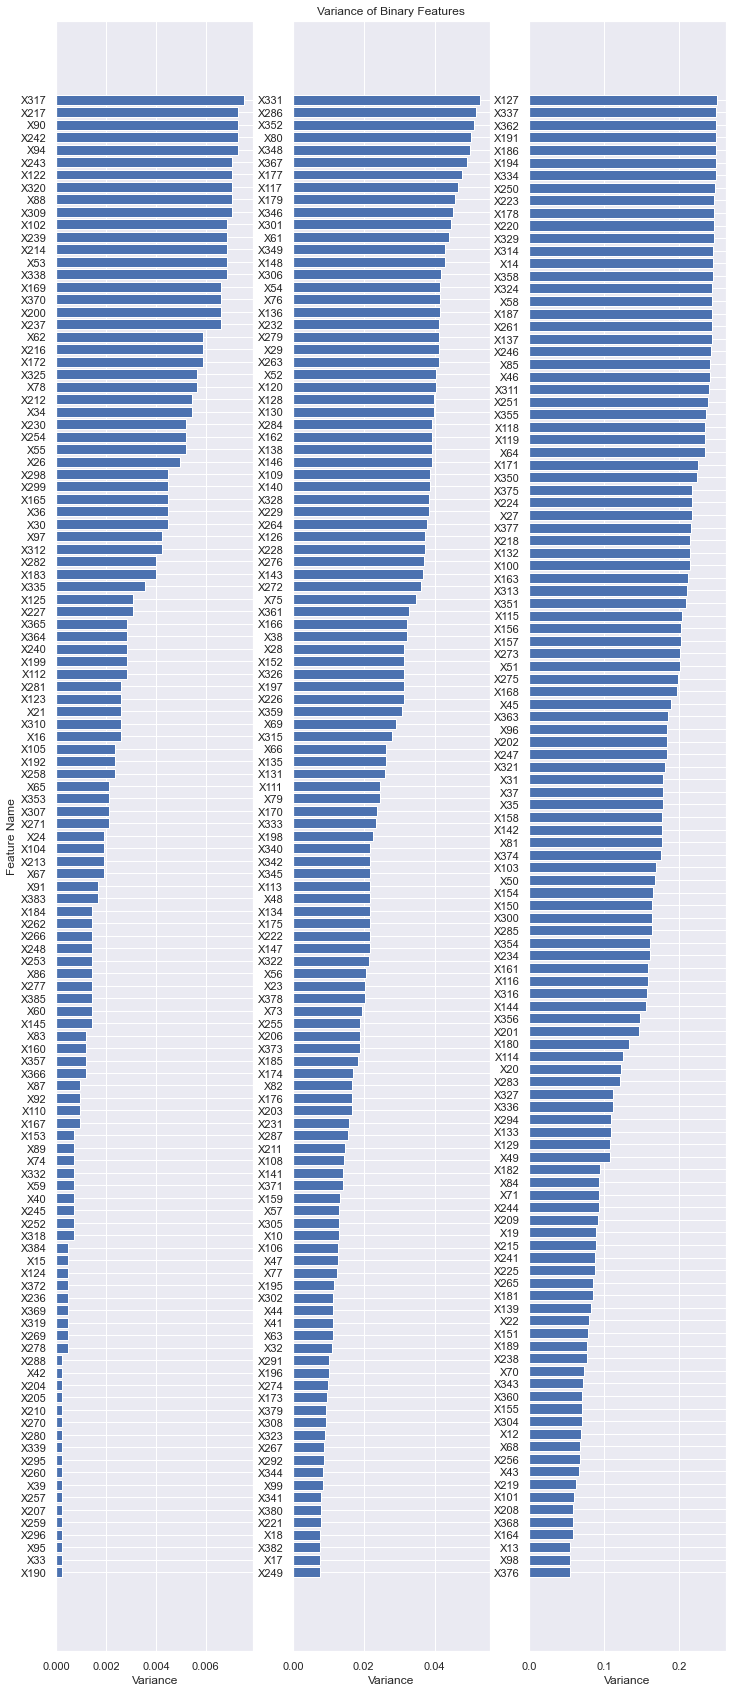

In [16]:
fig, ax = plt.subplots(1,3,figsize=(12,30))
ax[0].set_ylabel('Feature Name')
ax[1].set_title('Variance of Binary Features')

for i in range(3):
    names, var = binary_name[i*119:(i+1)*119], binary_var[i*119:(i+1)*119]
    ax[i].barh(range(len(var)),var)
    ax[i].set_xlabel('Variance')
    ax[i].set_yticks(range(len(var)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

In [17]:
counts[1]=binary_name[binary_var>0.01]

In [18]:
# drop features which have constant value
train_df.drop(counts[0],axis=1,inplace=True)

## 2. Check for null and unique values for test and train sets.

In [19]:
# ID column has unique value. Remove it.
train_df.drop('ID', axis=1, inplace=True)

In [20]:
train_df.isna().sum().sum()

0

* There is no Null Value.

### Checking cardinality of categorical variables

In [21]:
class plot_b:
    def __init__(self,col,df):
        self.col = col
        self.length = len(np.unique(df[col]))
        self.val_cnt = df[col].value_counts()
        
    def show(self):
        plt.figure(figsize=(12,5))
        plt.bar(range(len(self.val_cnt)),self.val_cnt.values)
        plt.title(f'Categorical Features : {self.col} --- Cardinality {self.length}')
        plt.xlabel('Feature Value')
        plt.ylabel('Occurences')
        plt.show()
        

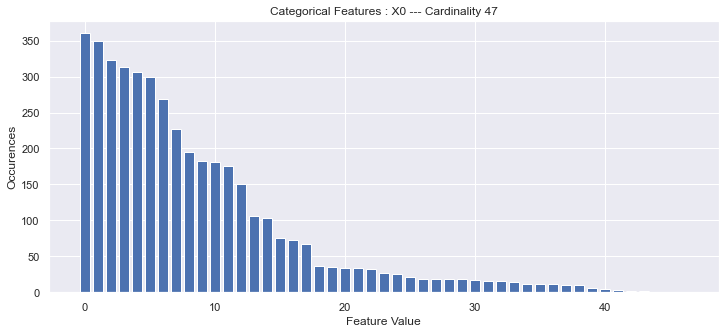

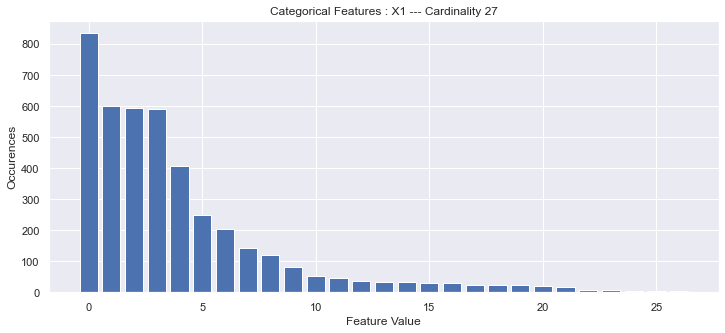

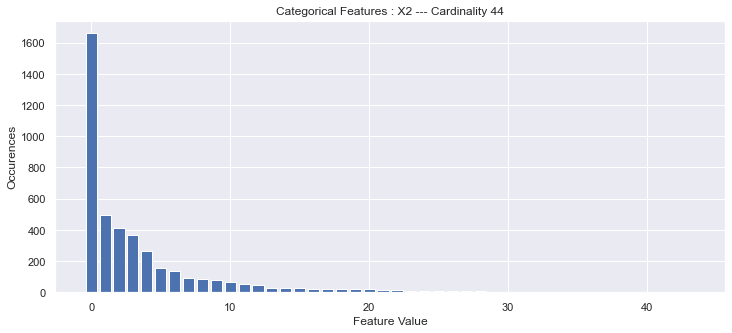

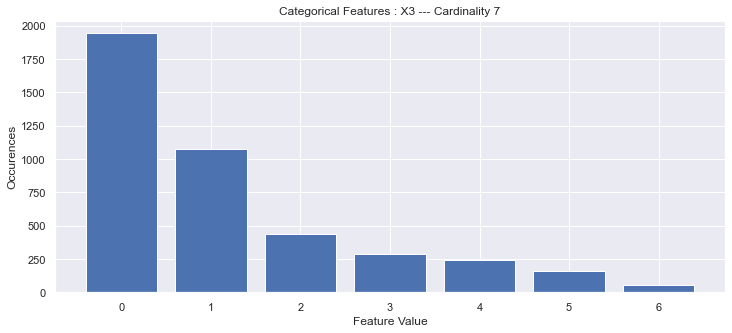

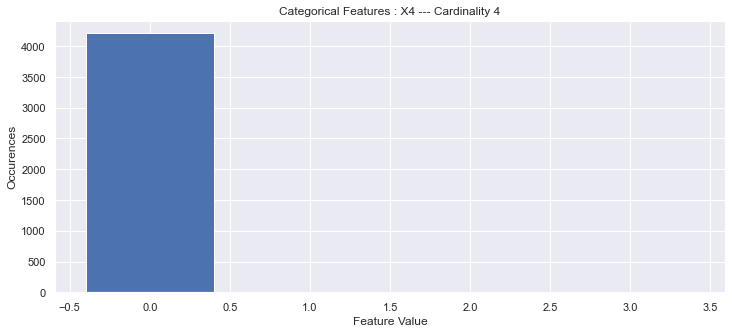

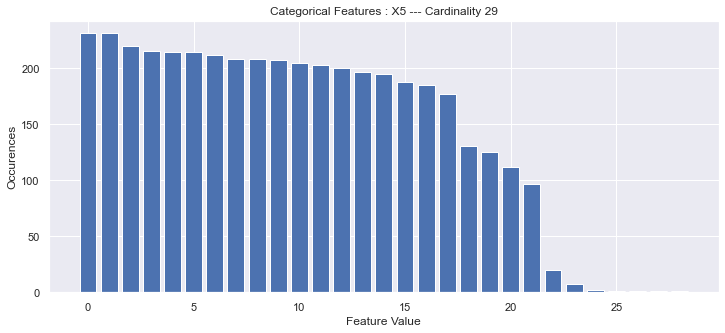

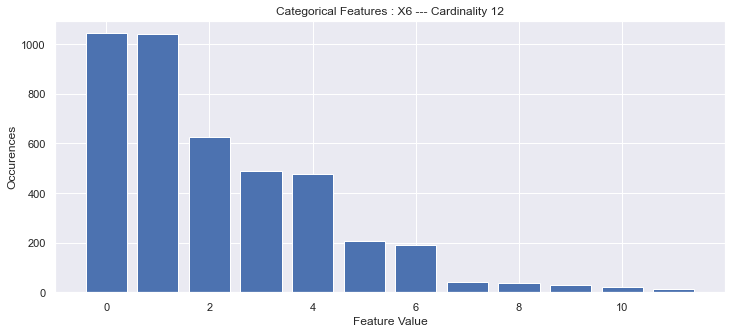

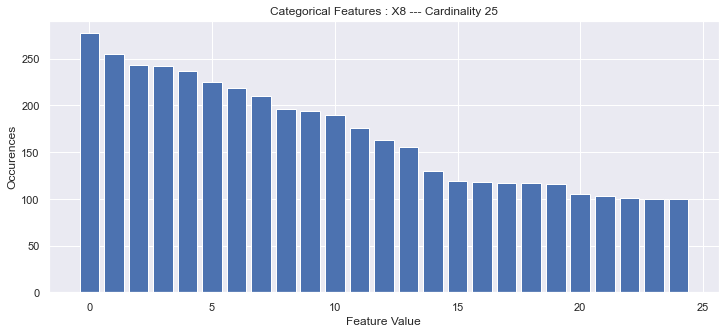

In [22]:
for i in range(8):
    plot_b(counts[3][i],train_df).show()

In [23]:
test_df = pd.read_csv(r'E:\Simplilearn\project\ML\Projects for Submission\Project 1 - Mercedes-Benz Greener Manufacturing\train.csv')

usable_cols = list(set(train_df.columns))

id_test = test_df['ID'].values

x_train = train_df[usable_cols]
x_test = test_df[usable_cols]
    

## 3. Apply label encoder.

In [24]:
for col in usable_cols:
    cardinality = len(np.unique(x_train[col]))
    
    if cardinality == 1:
        x_train.drop(col,axis=1)
        x_test.drop(col,axis=1)
    if cardinality > 2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[col] = x_train[col].apply(mapper)
        x_test[col] = x_test[col].apply(mapper)

In [25]:
x_train[counts[3]].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


## 4. Perform dimensionality reduction.

In [26]:
temp_data = pd.concat([x_train,y_train],axis=1)

In [27]:
corr_y = pd.DataFrame(temp_data.corr()['y'])

remove_col = corr_y[corr_y['y']>-0.01]
remove_col = remove_col[corr_y['y']<0.01]
remove_col = remove_col.T
remove_col = list(remove_col.columns)

In [28]:
x_train.drop(remove_col,axis=1,inplace=True)
x_test.drop(remove_col,axis=1,inplace=True)

## 5. XGBooost Algorithm

In [29]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.25,random_state=101)

d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)
d_test = xgb.DMatrix(x_test)

params={}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train, 'train'),(d_valid, 'valid')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.72156	valid-rmse:98.97394	train-r2:-61.85068	valid-r2:-60.25160
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.82462	valid-rmse:81.09906	train-r2:-41.12824	valid-r2:-40.12514
[20]	train-rmse:66.22322	valid-rmse:66.52071	train-r2:-27.28177	valid-r2:-26.66874
[30]	train-rmse:54.32167	valid-rmse:54.64395	train-r2:-18.02972	valid-r2:-17.67067
[40]	train-rmse:44.63422	valid-rmse:44.98379	train-r2:-11.84759	valid-r2:-11.65284
[50]	train-rmse:36.76500	valid-rmse:37.14484	train-r2:-7.71676	valid-r2:-7.62725
[60]	train-rmse:30.39117	valid-rmse:30.80915	train-r2:-4.95636	valid-r2:-4.93519
[70]	train-rmse:25.24887	valid-rmse:25.70973	train-r2:-3.11121	valid-r2:-3.13305
[80]	train-rmse:21.12185	

In [35]:
# prediction

In [36]:
p_test = clf.predict(d_test)
pred = pd.DataFrame()
pred['ID'] = id_test
pred['y'] = p_test

In [37]:
pred.head()

,ID,y
0,0,92.280411
1,6,92.769157
2,7,77.050674
3,9,77.672134
4,13,78.416443
